# Phishing Detection Training

- This notebook will implement and test multiple models for URL detection

First we import libraries and get data. We will split the data into:

Training - 70%

Cross Validation - 10%

Testing - 20%

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [3]:
data = pd.read_csv('data/data_featured.csv', index_col=0)
print("Columns Loaded in: ", list(data.columns))

X = data.drop('Label', axis=1)
Y = data['Label']

# Split into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

# Split training so we get 10% overrall cross validation
x_train, x_cross, y_train, y_cross = train_test_split(x_train, y_train,
                                                  test_size=0.125, random_state=1)

Columns Loaded in:  ['Label', 'periods', 'slashes', 'doubleSlashes', 'atSymbol', 'length', 'numberCount', 'firstdigit', 'wLetter', 'vLetter', 'xLetter', 'zLetter', 'jLetter', 'qLetter', 'pathHasDomain', 'IP', 'semicolon', 'domain', 'vowels', 'dotService', 'hash', 'Vocab']


# Train

Now we train a simple Random Forest classifier. We will evaluate using accuracies, f-score and confusion matricies. Also we can output the incorrect false negatives and positives into a .csv file to find out what we are doing wrong.

Training Model - Random Forest ...
Model Trained - Random Forest ... 
Caclulating Accuracies ...

Training f1 Score: 0.8776932980299754
Training Accuracy: 0.9345323385542764

Cross Validation f1 Score: 0.8345755693581781
Cross Validation Accuracy: 0.9127332301811232

Testing f1 Score: 0.8343017294415203
Testing Accuracy: 0.9117502502958041


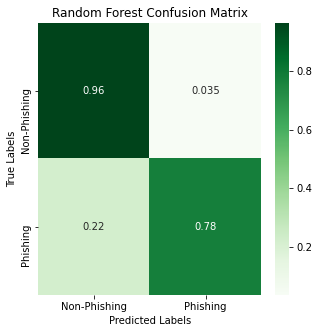

In [4]:
def print_accuracies(model):
    print("Caclulating Accuracies ...")
    train_predicts = model.predict(x_train)
    print('\nTraining f1 Score:', metrics.f1_score(y_train, train_predicts))
    print('Training Accuracy:', metrics.accuracy_score(y_train, train_predicts))

    cross_predicts = model.predict(x_cross)
    print('\nCross Validation f1 Score:', metrics.f1_score(y_cross, cross_predicts))
    print('Cross Validation Accuracy:', metrics.accuracy_score(y_cross, cross_predicts))

    test_predicts = model.predict(x_test)
    print('\nTesting f1 Score:', metrics.f1_score(y_test, test_predicts))
    print('Testing Accuracy:', metrics.accuracy_score(y_test, test_predicts))
    return train_predicts, cross_predicts, test_predicts

def confusion_matrix_plot(y_true, y_predict, title='Confusion Matrix'):
    confusion_data = metrics.confusion_matrix(y_true, y_predict, normalize='true')

    fig, ax = plt.subplots(figsize=(5, 5))
    
    sns.heatmap(confusion_data, cmap='Greens', annot=True); #annot=True to annotate cells

    plt.title(title)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    ax.set_xticklabels(['Non-Phishing', 'Phishing'])
    ax.set_yticklabels(['Non-Phishing', 'Phishing'])
    plt.show()

print('Training Model - Random Forest ...')

forest = RandomForestClassifier(min_samples_leaf=3)
forest.fit(x_train, y_train)

print("Model Trained - Random Forest ... ")

train_predicts, cross_predicts, test_predicts = print_accuracies(forest)
confusion_matrix_plot(y_test, test_predicts, title='Random Forest Confusion Matrix')

In [6]:
true_positives = y_cross == 1
predicted_negatives = cross_predicts == 0

og_data = pd.read_csv('data/phishing_site_urls.csv')

false_negative_indexes = np.array((true_positives != predicted_negatives)).nonzero()[0]

og_data.iloc[false_negative_indexes, 0].to_csv("false_negatives_cross_validation.csv")